<a href="https://colab.research.google.com/github/JuanRoVaz18/Eclipse/blob/main/act3_2p_si_split_2_25_gonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visa Continuous Value Prediction (2000–2025)**

**Author:** Juan Román González Vázquez  
**Project:** Analysis and Prediction of Visa’s Continuous Value  
**Study Period:** 2000 – 2025

**Github Repository**: https://github.com/JuanRoVaz18/act1_2p_si_eda_2_25_gonzalez


# 1) Dataset Basic Configuration (Choosing the best fit we have)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


df = pd.read_csv('dataset_ecuador_mensual_2000_2023.csv')

df.head()


,Date,Year,Month,Country,GDP_USA_Trillion,Unemployment_USA_pct,visas_Issued,visas_requested,Visa_Approval_Ecuador_pct,Global_Impact_Event,GDP_Ecuador_Billions,Unemployment_Ecuador_pct,Ecuador_party,USA_party
0,2000-01-01,2000,1,Ecuador,10.25,5.748357,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha
1,2000-02-01,2000,2,Ecuador,10.25,5.430868,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha
2,2000-03-01,2000,3,Ecuador,10.25,5.823844,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha
3,2000-04-01,2000,4,Ecuador,10.25,6.261515,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha
4,2000-05-01,2000,5,Ecuador,10.25,5.382923,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha


In [2]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.columns


Index(['date', 'year', 'month', 'country', 'gdp_usa_trillion',
       'unemployment_usa_pct', 'visas_issued', 'visas_requested',
       'visa_approval_ecuador_pct', 'global_impact_event',
       'gdp_ecuador_billions', 'unemployment_ecuador_pct', 'ecuador_party',
       'usa_party'],
      dtype='object')

In this case, we are only working with Ecuador, so it doesn't make sense. If we had data from other countries, this feature would be really important.

In [3]:
df = df.drop(columns=['country'])

df.dtypes

,0
date,object
year,int64
month,int64
gdp_usa_trillion,float64
unemployment_usa_pct,float64
visas_issued,float64
visas_requested,float64
visa_approval_ecuador_pct,float64
global_impact_event,object
gdp_ecuador_billions,float64


We will be dropping the original column date, because we want to represent it with a numerical value. And we also create one called days since 2000

In [4]:
df['date'] = pd.to_datetime(df['date'])

df['days_since_2000'] = (df['date'] - pd.to_datetime('2000-01-01')).dt.days

df = df.drop(columns=['date'])

df.head()

,year,month,gdp_usa_trillion,unemployment_usa_pct,visas_issued,visas_requested,visa_approval_ecuador_pct,global_impact_event,gdp_ecuador_billions,unemployment_ecuador_pct,ecuador_party,usa_party,days_since_2000
0,2000,1,10.25,5.748357,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha,0
1,2000,2,10.25,5.430868,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha,31
2,2000,3,10.25,5.823844,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha,60
3,2000,4,10.25,6.261515,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha,91
4,2000,5,10.25,5.382923,2583.0,3833.0,67.39,Ninguno,18.3,10.1,Centro,Derecha,121


# 2) Using the encoding techniques that can be applied to this dataset, in my case it applies because the model fit better with the techniques applied.

In [5]:
#One Hot
df = pd.get_dummies(df, columns=['usa_party', 'ecuador_party'], drop_first=True)
X = df.drop('visa_approval_ecuador_pct', axis=1)
y = df['visa_approval_ecuador_pct']

#Binary
df['Global_Impact_Event_binary'] = df['global_impact_event'].apply(lambda x: 1 if x != 'Ninguno' else 0)
df = df.drop(columns=['global_impact_event'])

#Feature Scaling
features_scale = ['gdp_usa_trillion', 'unemployment_usa_pct', 'gdp_ecuador_billions', 'unemployment_ecuador_pct']
scaler = StandardScaler()
df[features_scale] = scaler.fit_transform(df[features_scale])
df[features_scale].head()

X.dtypes
df.head()

,year,month,gdp_usa_trillion,unemployment_usa_pct,visas_issued,visas_requested,visa_approval_ecuador_pct,gdp_ecuador_billions,unemployment_ecuador_pct,days_since_2000,usa_party_Izquierda,ecuador_party_Centro-Derecha,ecuador_party_Izquierda,Global_Impact_Event_binary
0,2000,1,-1.416509,0.510291,2583.0,3833.0,67.39,-1.460171,1.721836,0,False,False,False,0
1,2000,2,-1.416509,-0.127790,2583.0,3833.0,67.39,-1.460171,1.721836,31,False,False,False,0
2,2000,3,-1.416509,0.662003,2583.0,3833.0,67.39,-1.460171,1.721836,60,False,False,False,0
3,2000,4,-1.416509,1.541623,2583.0,3833.0,67.39,-1.460171,1.721836,91,False,False,False,0
4,2000,5,-1.416509,-0.224148,2583.0,3833.0,67.39,-1.460171,1.721836,121,False,False,False,0


In [6]:
X.dtypes


,0
year,int64
month,int64
gdp_usa_trillion,float64
unemployment_usa_pct,float64
visas_issued,float64
visas_requested,float64
global_impact_event,object
gdp_ecuador_billions,float64
unemployment_ecuador_pct,float64
days_since_2000,int64


# 3) Division of the dataset, training and testing.

### Hold-Out Method  (Just to have a reference for future comparation)

In this case, we will test three different methods of data splitting: the traditional Hold-Out method and two additional approaches that will allow us to make comparisons.

In [7]:
X = df.drop('visa_approval_ecuador_pct', axis=1)
y = df['visa_approval_ecuador_pct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")

Dimensiones de X_train: (230, 13)
Dimensiones de X_test: (58, 13)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R²: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.08437657322053947
R²: 0.9908214881234544
Mean Absolute Error (MAE): 0.22553746733904834


### Time Series Split



A cross validation technique specially for time series data.

This is the best fit fot time series analysisi to rnsure that the model doesnt use future data to predict past data. (A Bad fit in this case)

In [17]:
tscv = TimeSeriesSplit(n_splits=5)
ts_results = []

for train_index, test_index in tscv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    ts_results.append([r2, mse, mae])



In [24]:
ts_results_df = pd.DataFrame(ts_results, columns=['R2', 'MSE', 'MAE'])
print("\n Model - TimeSeriesSplit")
display(ts_results_df)

ts_summary = ts_results_df.mean()
display(ts_summary)



 Model - TimeSeriesSplit


,R2,MSE,MAE
0,-504.397354,303.074158,15.973895
1,-29.349522,37.762393,5.208641
2,-61.302336,243.509848,13.647523
3,0.926747,1.971592,1.189031
4,0.901016,0.833768,0.808553


,0
R2,-118.644290
MSE,117.430352
MAE,7.365529


### KFold Cross-Validation



This is a Method that hep us to evaluate by splitting the data into "k" subsets.

Helps to have more stability and generalizability of the model by using multiple training and testing set.

In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=42) #In this case i will only be using 5 splits

kf_results = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    kf_results.append([r2, mse, mae])



In [20]:
kf_results_df = pd.DataFrame(kf_results, columns=['R2', 'MSE', 'MAE'])

print("Model - KFold")
display(kf_results_df)

kf_summary = kf_results_df.mean()
print(f"Avg (KFold):")
display(kf_summary)

Model - KFold


,R2,MSE,MAE
0,0.990821,0.084377,0.225537
1,0.988584,0.119031,0.283593
2,0.991656,0.074968,0.208627
3,0.992223,0.116294,0.263462
4,0.991186,0.075442,0.225491


Avg (KFold):


,0
R2,0.990894
MSE,0.094022
MAE,0.241342


# 4) Comparation of the different Data-Split Techniques

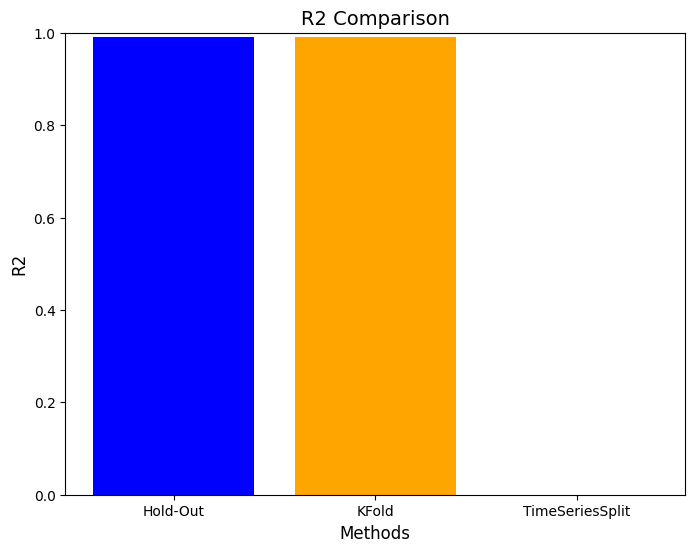

In [30]:
r2_holdout = r2
r2_kfold = kf_results_df['R2'].mean()
r2_timeseries = ts_results_df['R2'].mean()

methods = ['Hold-Out', 'KFold', 'TimeSeriesSplit']
r2_scores = [r2_holdout, r2_kfold, r2_timeseries]

plt.figure(figsize=(8, 6))
plt.bar(methods, r2_scores, color=['blue', 'orange', 'green'])


plt.title('R2 Comparison', fontsize=14)
plt.xlabel('Methods', fontsize=12)
plt.ylabel('R2', fontsize=12)
plt.ylim([0, 1])

plt.show()
